In [52]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = """
SELECT * FROM POWER_UNBALANCE
"""
power = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
power = power.sort_values(by='TIMESTAMP')

power

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,TIMESTAMP,UNBALANCE_kW,SOURCE_ZONE
0,2023-11-01 01:00:23.830,-629.990,EOLICO_CSUD
1,2023-11-01 01:00:23.830,-208.450,EOLICO_SUD
2,2023-11-01 01:00:23.830,-781.500,IDRO-NON-PROGRAMMABILE_H_CNOR
3,2023-11-01 01:00:23.830,104.480,IDRO-NON-PROGRAMMABILE_H_CSUD
4,2023-11-01 01:00:23.830,2238.280,IDRO-NON-PROGRAMMABILE_H_NORD
...,...,...,...
6779463,2024-12-06 10:17:42.973,-21.921,EOLICO_SUD
6779462,2024-12-06 10:17:42.973,167.940,EOLICO_SICI
6779461,2024-12-06 10:17:42.973,3403.510,EOLICO_CSUD
6779468,2024-12-06 10:17:42.973,5.350,IDRO-NON-PROGRAMMABILE_H24_CNOR


In [53]:
power_curve = power.pivot(index='TIMESTAMP', columns='SOURCE_ZONE', values='UNBALANCE_kW')

# Rename columns for clarity (optional, if needed)
power_curve.columns = [f"UNBALANCE_{col}" for col in power_curve.columns]

# Display the resulting DataFrame
power_curve = power_curve.resample('H').sum()

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_696\2330664153.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  power_curve = power_curve.resample('H').sum()


In [54]:
power_curve

,UNBALANCE_EOLICO_CALA,UNBALANCE_EOLICO_CSUD,UNBALANCE_EOLICO_SICI,UNBALANCE_EOLICO_SUD,UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD,UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CNOR,UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CSUD,UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_NORD,UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CNOR,UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CSUD,...,UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD,UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_CNOR,UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_NORD,UNBALANCE_IDRO-PROGRAMMABILE_NORD,UNBALANCE_SOLARE_CNOR,UNBALANCE_SOLARE_CSUD,UNBALANCE_SOLARE_NORD,UNBALANCE_SOLARE_SARD,UNBALANCE_SOLARE_SICI,UNBALANCE_SOLARE_SUD
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2023-11-01 01:00:00,0.000,-11836.96,0.00,-9885.640,0.00,0.00,0.0,0.00,-34653.04,-2608.72,...,0.00,0.0,0.0,12447.43,0.000,0.000,0.000,0.000,0.00,0.000
2023-11-01 02:00:00,0.000,9075.50,0.00,1052.930,0.00,0.00,0.0,0.00,-30515.39,933.02,...,0.00,0.0,0.0,12130.31,0.000,0.000,0.000,0.000,0.00,0.000
2023-11-01 03:00:00,0.000,9300.76,0.00,13287.240,0.00,0.00,0.0,0.00,-32794.26,-7879.44,...,0.00,0.0,0.0,12297.07,0.000,0.000,0.000,0.000,0.00,0.000
2023-11-01 04:00:00,0.000,9968.71,0.00,14031.350,0.00,0.00,0.0,0.00,-34100.85,6210.08,...,0.00,0.0,0.0,25895.64,0.000,0.000,0.000,0.000,0.00,0.000
2023-11-01 05:00:00,0.000,18647.19,0.00,4583.640,0.00,0.00,0.0,0.00,-36480.18,24022.56,...,0.00,0.0,0.0,-28886.10,0.000,0.000,0.000,0.000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-06 06:00:00,12032.320,-12108.97,6597.25,-20817.681,5639.78,3524.51,0.0,-54518.23,1595.02,482.28,...,120454.74,0.0,0.0,11586.03,0.000,0.000,3.600,0.000,0.00,0.000
2024-12-06 07:00:00,4950.740,3907.54,-1092.16,17103.698,182.13,687.98,0.0,-86215.23,-753.23,247.42,...,75484.06,0.0,0.0,-118239.59,-8401.308,-6192.815,-2371.267,-1931.498,-590.22,-4075.845
2024-12-06 08:00:00,-1914.548,-18805.46,2765.25,6505.170,-1379.81,159.92,0.0,126235.54,-189.00,-1351.18,...,250287.50,0.0,0.0,63347.56,-41792.882,-14817.252,-13718.668,4309.514,10317.54,38531.568


In [55]:
print(power_curve.columns.tolist())

['UNBALANCE_EOLICO_CALA', 'UNBALANCE_EOLICO_CSUD', 'UNBALANCE_EOLICO_SICI', 'UNBALANCE_EOLICO_SUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD_NO-ADJ', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_NORD', 'UNBALANCE_IDRO-PROGRAMMABILE_NORD', 'UNBALANCE_SOLARE_CNOR', 'UNBALANCE_SOLARE_CSUD', 'UNBALANCE_SOLARE_NORD', 'UNBALANCE_SOLARE_SARD', 'UNBALANCE_SOLARE_SICI', 'UNBALANCE_SOLARE_SUD']


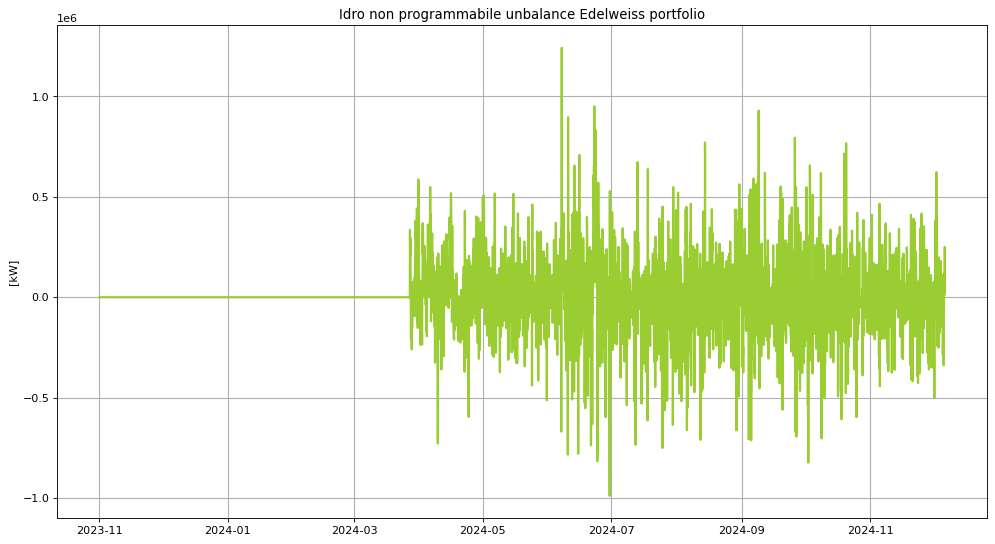

In [56]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(power_curve["UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD"], linewidth=2, color = "yellowgreen") 

ax.set_title("Idro non programmabile unbalance Edelweiss portfolio"); ax.set_ylabel("[kW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

In [57]:
macronord_columns = [col for col in power_curve.columns if "MACRONORD" in col]
print(macronord_columns)

['UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD']


In [58]:
nord_columns = [col for col in power_curve.columns if "NORD" in col]
print(nord_columns)

['UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD_NO-ADJ', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_NORD', 'UNBALANCE_IDRO-PROGRAMMABILE_NORD', 'UNBALANCE_SOLARE_NORD']


In [59]:
macrosud_columns = [col for col in power_curve.columns if "MACROSUD" in col]
print(macrosud_columns)

['UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD']


In [60]:
sud_columns = [col for col in power_curve.columns if "SUD" in col]
print(sud_columns)

['UNBALANCE_EOLICO_CSUD', 'UNBALANCE_EOLICO_SUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CSUD', 'UNBALANCE_SOLARE_CSUD', 'UNBALANCE_SOLARE_SUD']


In [61]:
print(power_curve.columns.tolist())

['UNBALANCE_EOLICO_CALA', 'UNBALANCE_EOLICO_CSUD', 'UNBALANCE_EOLICO_SICI', 'UNBALANCE_EOLICO_SUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD_NO-ADJ', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_NORD', 'UNBALANCE_IDRO-PROGRAMMABILE_NORD', 'UNBALANCE_SOLARE_CNOR', 'UNBALANCE_SOLARE_CSUD', 'UNBALANCE_SOLARE_NORD', 'UNBALANCE_SOLARE_SARD', 'UNBALANCE_SOLARE_SICI', 'UNBALANCE_SOLARE_SUD']


In [62]:
msud_power_curve = power.pivot(index='TIMESTAMP', columns='SOURCE_ZONE', values='UNBALANCE_kW')

# Rename columns for clarity (optional, if needed)
msud_power_curve.columns = [f"UNBALANCE_{col}" for col in msud_power_curve.columns]

# Display the resulting DataFrame
msud_power_curve = msud_power_curve.resample('15min').sum()
#msud_power_curve = msud_power_curve.resample('H').sum()

msud_power_curve = msud_power_curve[["UNBALANCE_EOLICO_CALA", "UNBALANCE_EOLICO_CSUD", "UNBALANCE_EOLICO_SICI", "UNBALANCE_EOLICO_SUD", "UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD", "UNBALANCE_SOLARE_CNOR", "UNBALANCE_SOLARE_CSUD", "UNBALANCE_SOLARE_SARD", "UNBALANCE_SOLARE_SICI", "UNBALANCE_SOLARE_SUD"]]

msud_power_curve = msud_power_curve.rename_axis("ORAINI")

msud_power_curve

,UNBALANCE_EOLICO_CALA,UNBALANCE_EOLICO_CSUD,UNBALANCE_EOLICO_SICI,UNBALANCE_EOLICO_SUD,UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD,UNBALANCE_SOLARE_CNOR,UNBALANCE_SOLARE_CSUD,UNBALANCE_SOLARE_SARD,UNBALANCE_SOLARE_SICI,UNBALANCE_SOLARE_SUD
ORAINI,,,,,,,,,,
2023-11-01 01:00:00,0.0,-9119.20,0.00,-767.600,0.00,0.00,0.000,0.00,0.00,0.000
2023-11-01 01:15:00,0.0,-2392.80,0.00,-1339.170,0.00,0.00,0.000,0.00,0.00,0.000
2023-11-01 01:30:00,0.0,-1069.69,0.00,-3918.290,0.00,0.00,0.000,0.00,0.00,0.000
2023-11-01 01:45:00,0.0,744.73,0.00,-3860.580,0.00,0.00,0.000,0.00,0.00,0.000
2023-11-01 02:00:00,0.0,1970.98,0.00,-2087.920,0.00,0.00,0.000,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...
2024-12-06 09:15:00,-717.0,28195.83,341.12,3341.475,-3485.55,-9222.96,-11963.115,-9927.65,3742.10,21376.235
2024-12-06 09:30:00,-717.0,32961.43,405.80,3815.825,-6770.29,15229.17,-1935.665,-9987.09,4619.71,46654.925
2024-12-06 09:45:00,-717.0,40672.75,1176.13,4521.605,-1774.79,30465.07,12191.305,-14082.27,4609.09,44002.105


In [63]:
# Summing Purchases from all MI1 zones to get MSUD_PURCHASED for MI1
msud_eolico = (msud_power_curve['UNBALANCE_EOLICO_CALA'] + 
                      msud_power_curve['UNBALANCE_EOLICO_CSUD'] + 
                      msud_power_curve['UNBALANCE_EOLICO_SICI'] + 
                      msud_power_curve['UNBALANCE_EOLICO_SUD'] )

# Summing Sales from all MI1 zones to get MSUD_SALES for MI1
msud_solare = (msud_power_curve['UNBALANCE_SOLARE_CNOR'] + 
                  msud_power_curve['UNBALANCE_SOLARE_CSUD'] + 
                  msud_power_curve['UNBALANCE_SOLARE_SARD'] + 
                  msud_power_curve['UNBALANCE_SOLARE_SICI'] + 
                  msud_power_curve['UNBALANCE_SOLARE_SUD'])

# Create DataFrame for MSUD_PURCHASED and MSUD_SALES for MI1
msud_port_unbalance = pd.DataFrame({
    'UNBALANCE_EOLICO_MACROSUD': msud_eolico,
    'UNBALANCE_SOLAR_MACROSUD': msud_solare,
})

msud_port_unbalance['UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD'] = msud_power_curve['UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD']


In [64]:
msud_port_unbalance

,UNBALANCE_EOLICO_MACROSUD,UNBALANCE_SOLAR_MACROSUD,UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD
ORAINI,,,
2023-11-01 01:00:00,-9886.800,0.000,0.00
2023-11-01 01:15:00,-3731.970,0.000,0.00
2023-11-01 01:30:00,-4987.980,0.000,0.00
2023-11-01 01:45:00,-3115.850,0.000,0.00
2023-11-01 02:00:00,-116.940,0.000,0.00
...,...,...,...
2024-12-06 09:15:00,31161.425,-5995.390,-3485.55
2024-12-06 09:30:00,36466.055,54581.050,-6770.29
2024-12-06 09:45:00,45653.485,77185.300,-1774.79
